# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
pip install palmerpenguins

In [20]:
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [21]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [22]:
X = penguins.drop('bill_depth_mm', axis=1)
y = penguins['bill_depth_mm']

categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [23]:
X_processed = preprocessor.fit_transform(X)

models = {
    "Linear Regression": LinearRegression(),
    "kNN (K=3)": KNeighborsRegressor(n_neighbors=3),
    "kNN (K=7)": KNeighborsRegressor(n_neighbors=7),
    "Decision Tree": DecisionTreeRegressor()
}

training_errors = {}

for name, model in models.items():
    model.fit(X_processed, y)
    y_pred = model.predict(X_processed)
    training_errors[name] = mean_squared_error(y, y_pred)

training_errors

{'Linear Regression': 0.5990638507357771,
 'kNN (K=3)': 0.3707741074407741,
 'kNN (K=7)': 0.4864668750383038,
 'Decision Tree': 0.0}

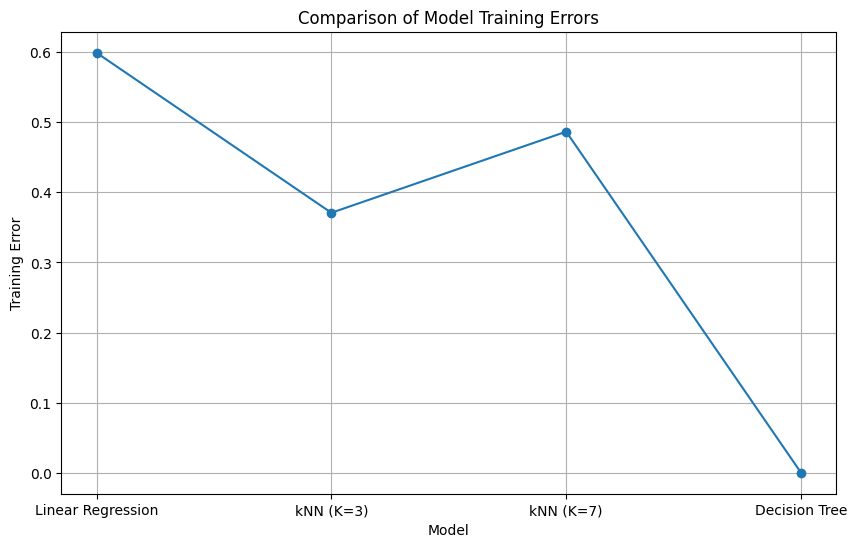

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(training_errors.keys(), training_errors.values(), marker='o')
plt.xlabel('Model')
plt.ylabel('Training Error')
plt.title('Comparison of Model Training Errors')
plt.grid(True)
plt.show()

Decision Tree is our best model.